Importing the necessary libraries

In [107]:
pip install xgboost lightbgm catboost seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for lightbgm


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import sklearn.preprocessing
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble

Data Collection (importing the dataset)

In [109]:
data = pd.read_csv('WeatherAUS.csv - Dataset.csv')

Analysing the Dataset

In [110]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,@
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,0.0
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,NaN


In [111]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@
0,12/1/2008,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,12/2/2008,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,12/3/2008,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,12/4/2008,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,12/5/2008,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [113]:
data.shape

(145460, 24)

Checking whether the dataset has null values

In [114]:
data.isnull().sum()

Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@                145460
dtype: int64

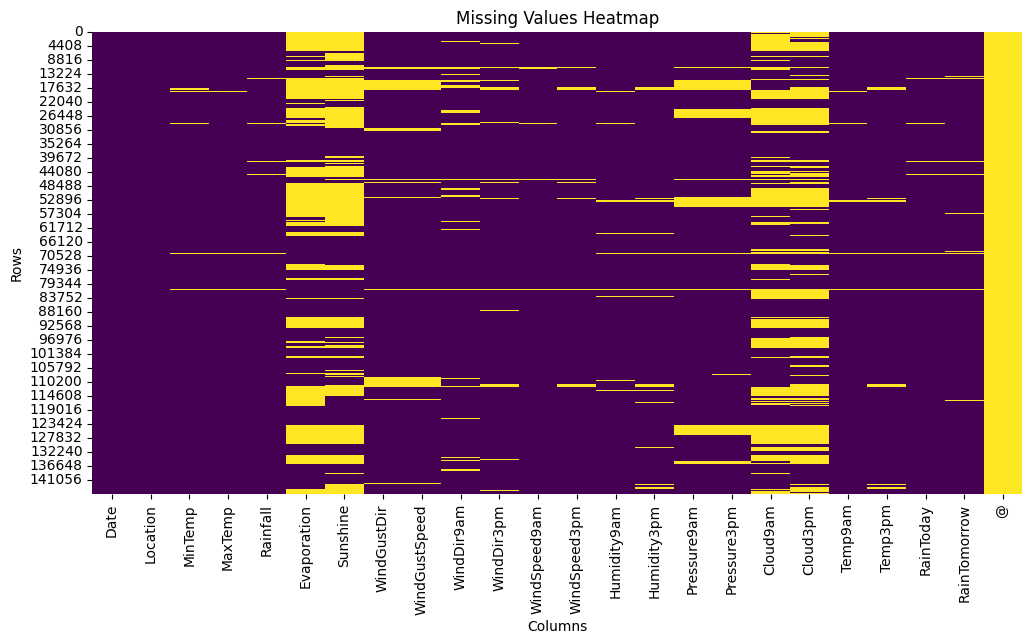

In [115]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

As the dataset has null values, data preprocessing should be done

Data Preprocessing: Handle missing values, encode categorical variables, and prepare features/labels

In [116]:
data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm','@'], axis=1, inplace=True)


In [117]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Delhi,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12/2/2008,Delhi,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12/3/2008,Delhi,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12/4/2008,Delhi,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12/5/2008,Delhi,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


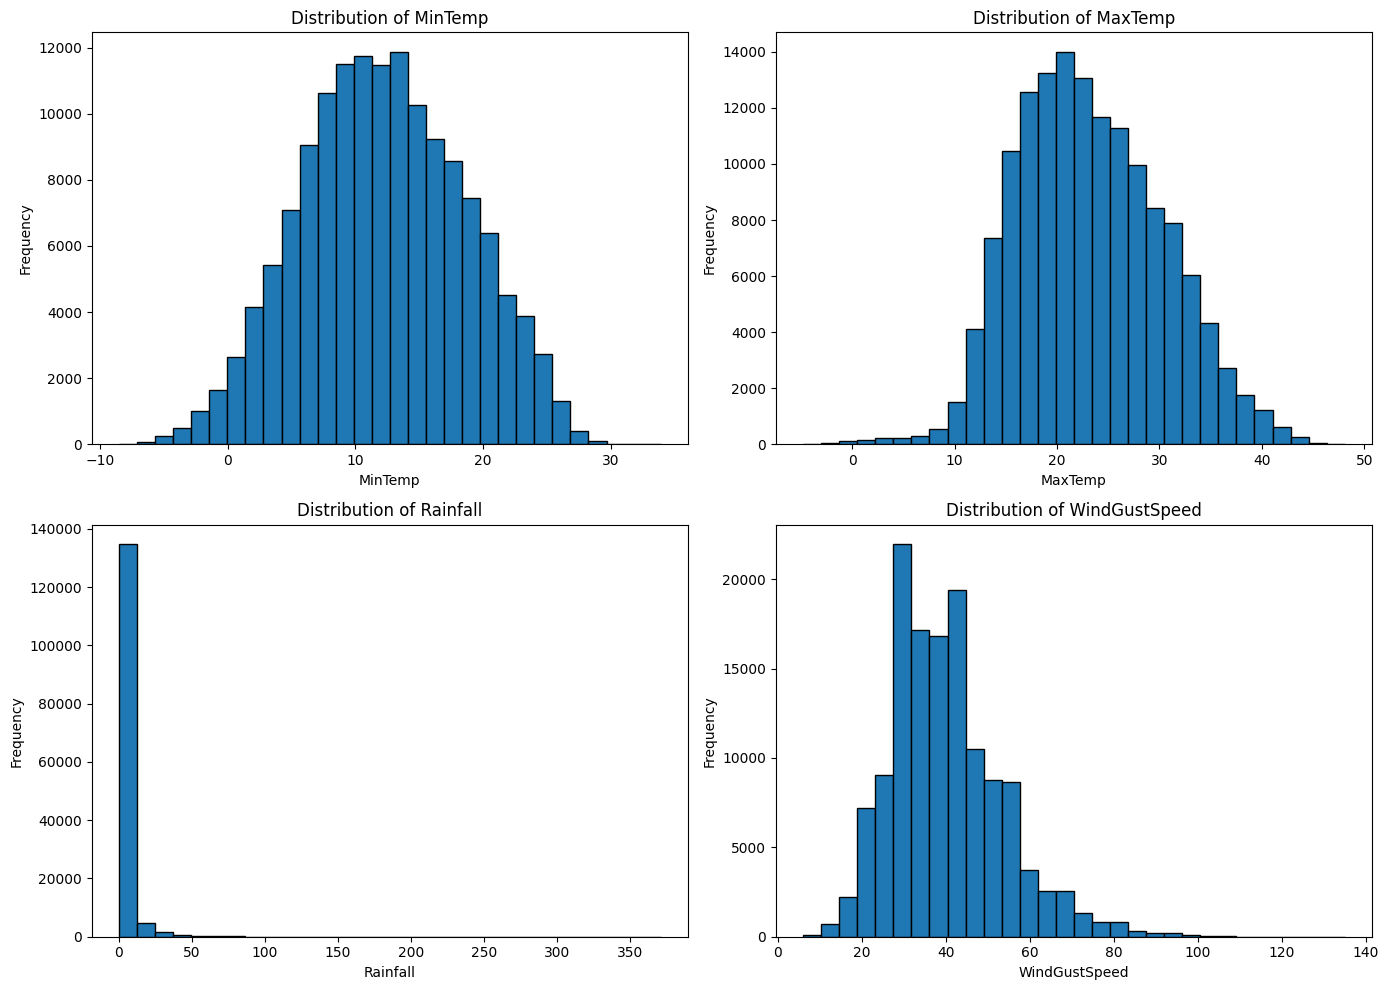

In [118]:
# Data Visualization - Feature Distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Select first 4 numeric columns for visualization
numeric_cols = data.select_dtypes(include=['number']).columns[:4]

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(data[col], bins=30, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

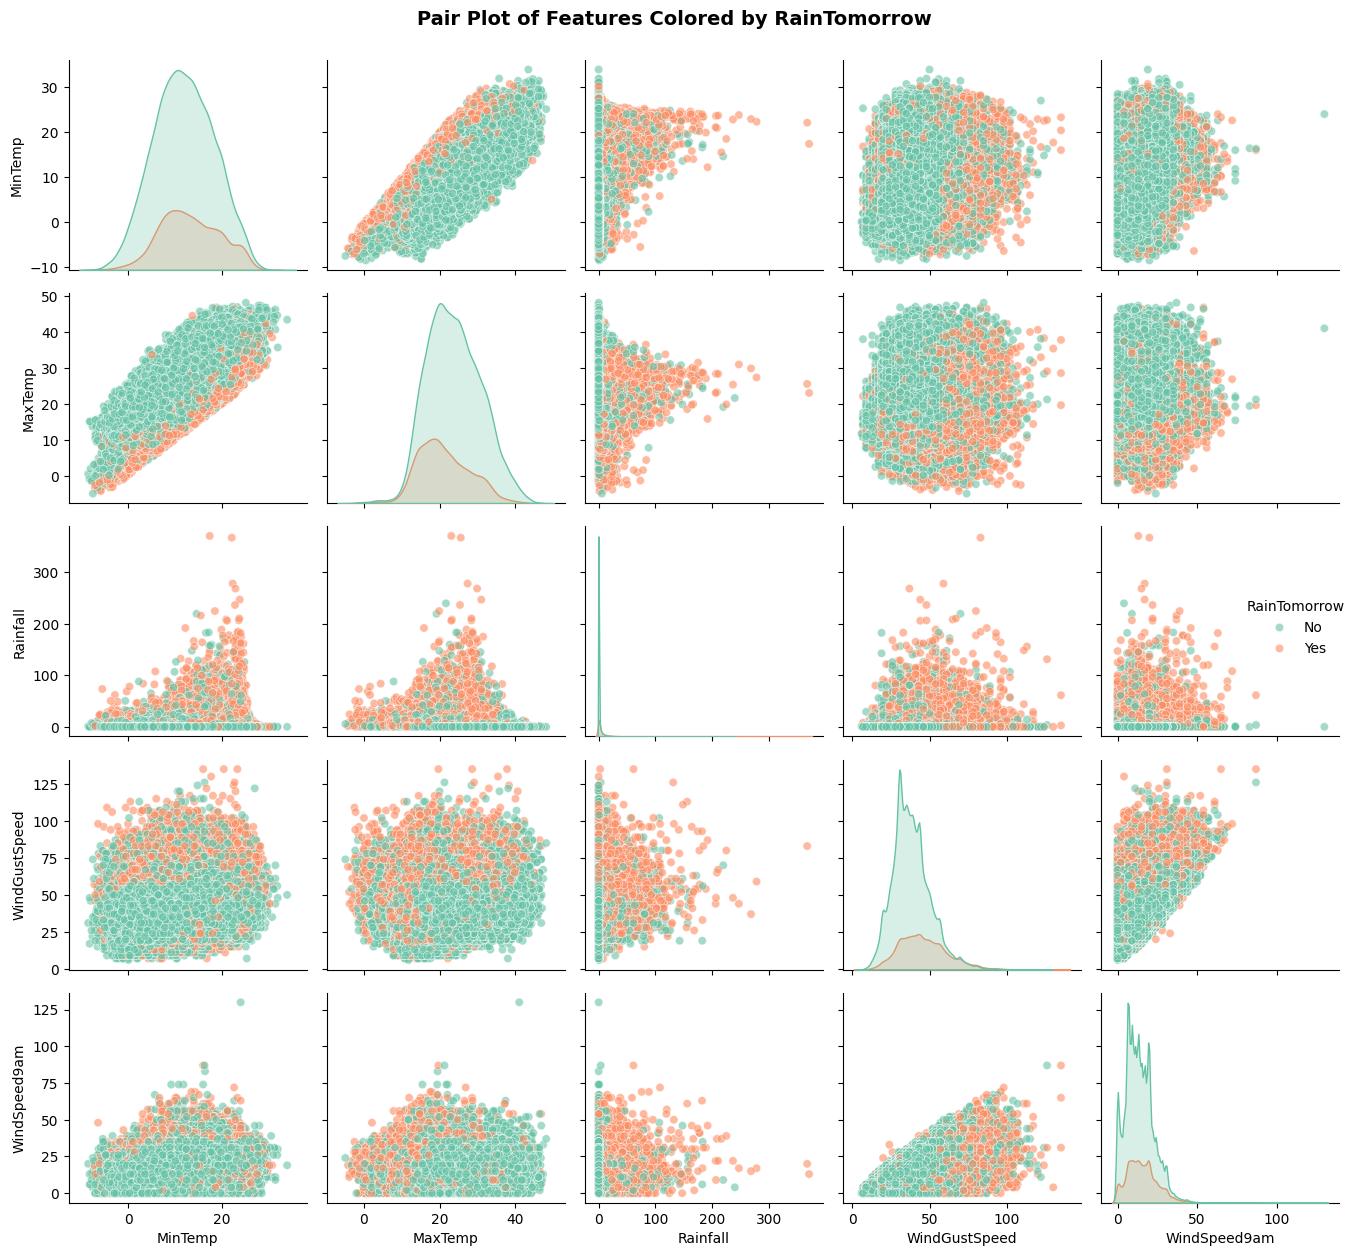

In [119]:
# Pair Plot for Feature Relationships
numeric_features = data.select_dtypes(include=['number']).columns.tolist()
selected_cols = numeric_features[:5]  # Select first 5 numeric features

plot_data = data[selected_cols].copy()
plot_data['RainTomorrow'] = data['RainTomorrow']

sns.pairplot(plot_data, hue='RainTomorrow', diag_kind='kde', plot_kws={'alpha': 0.6}, palette='Set2')
plt.suptitle('Pair Plot of Features Colored by RainTomorrow', fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_26292\3347571351.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([data_no_rain, data_rain], labels=['No Rain', 'Rain'])
C:\Users\HP\AppData\Local\Temp\ipykernel_26292\3347571351.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([data_no_rain, data_rain], labels=['No Rain', 'Rain'])
C:\Users\HP\AppData\Local\Temp\ipykernel_26292\3347571351.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([data_no_rain, data_rain], labels=['No Rain', 'Rain'])
C:\Users\HP\AppData\Local\Temp\ipykernel_26292\3347571351.py:9: MatplotlibDe

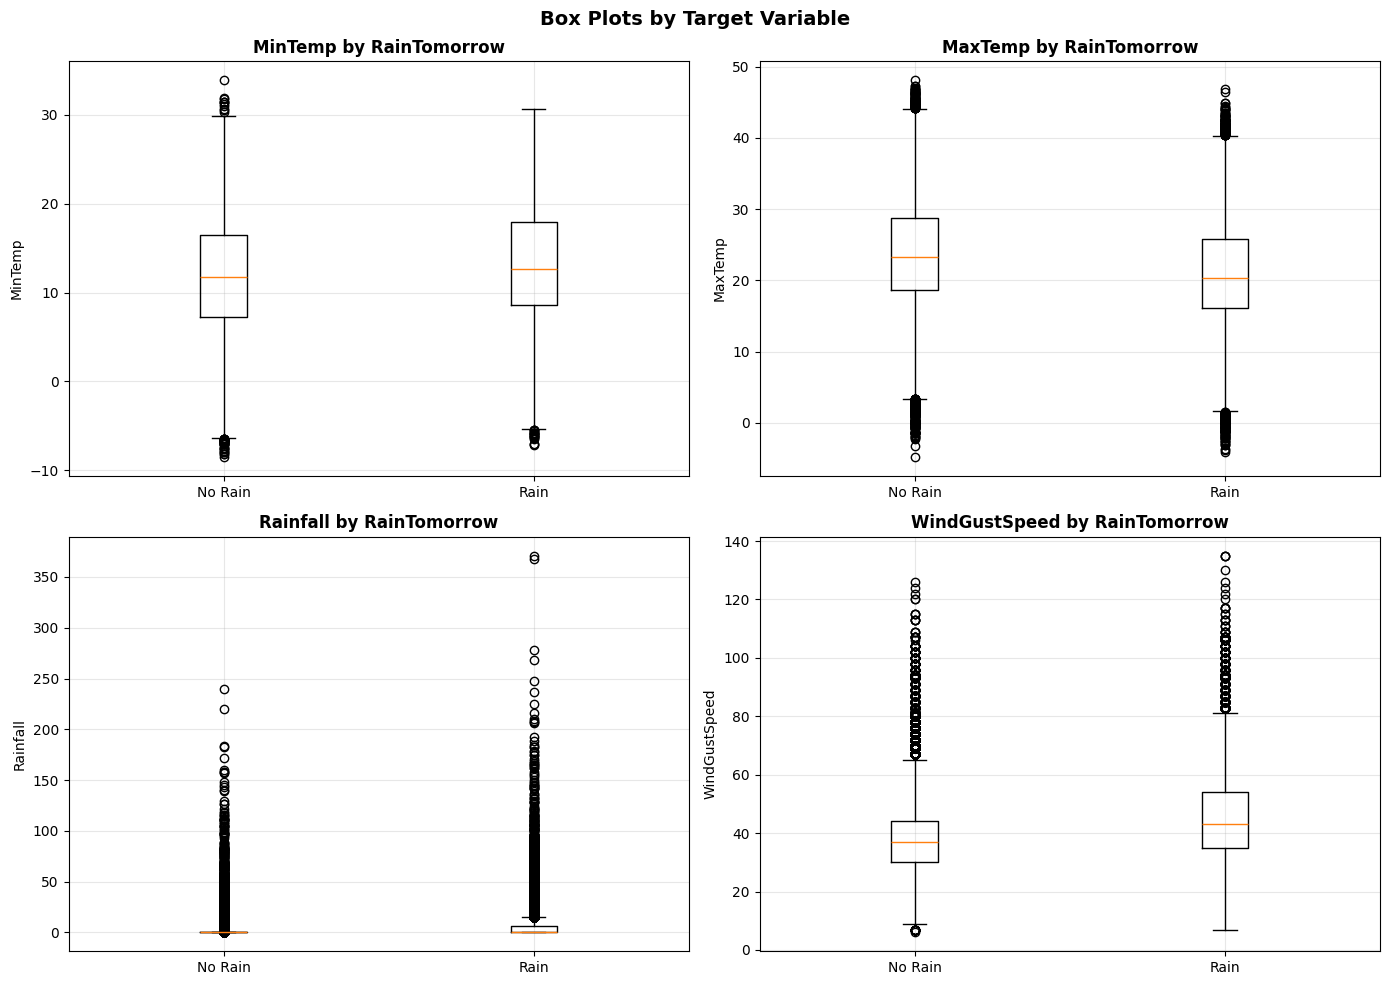

In [142]:
# Box Plot by Target Variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
numeric_cols = data.select_dtypes(include=['number']).columns[:4]

for idx, col in enumerate(numeric_cols):
    data_no_rain = data[data['RainTomorrow'] == 0][col]
    data_rain = data[data['RainTomorrow'] == 1][col]
    axes[idx].boxplot([data_no_rain, data_rain], labels=['No Rain', 'Rain'])
    axes[idx].set_title(f'{col} by RainTomorrow', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Box Plots by Target Variable', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

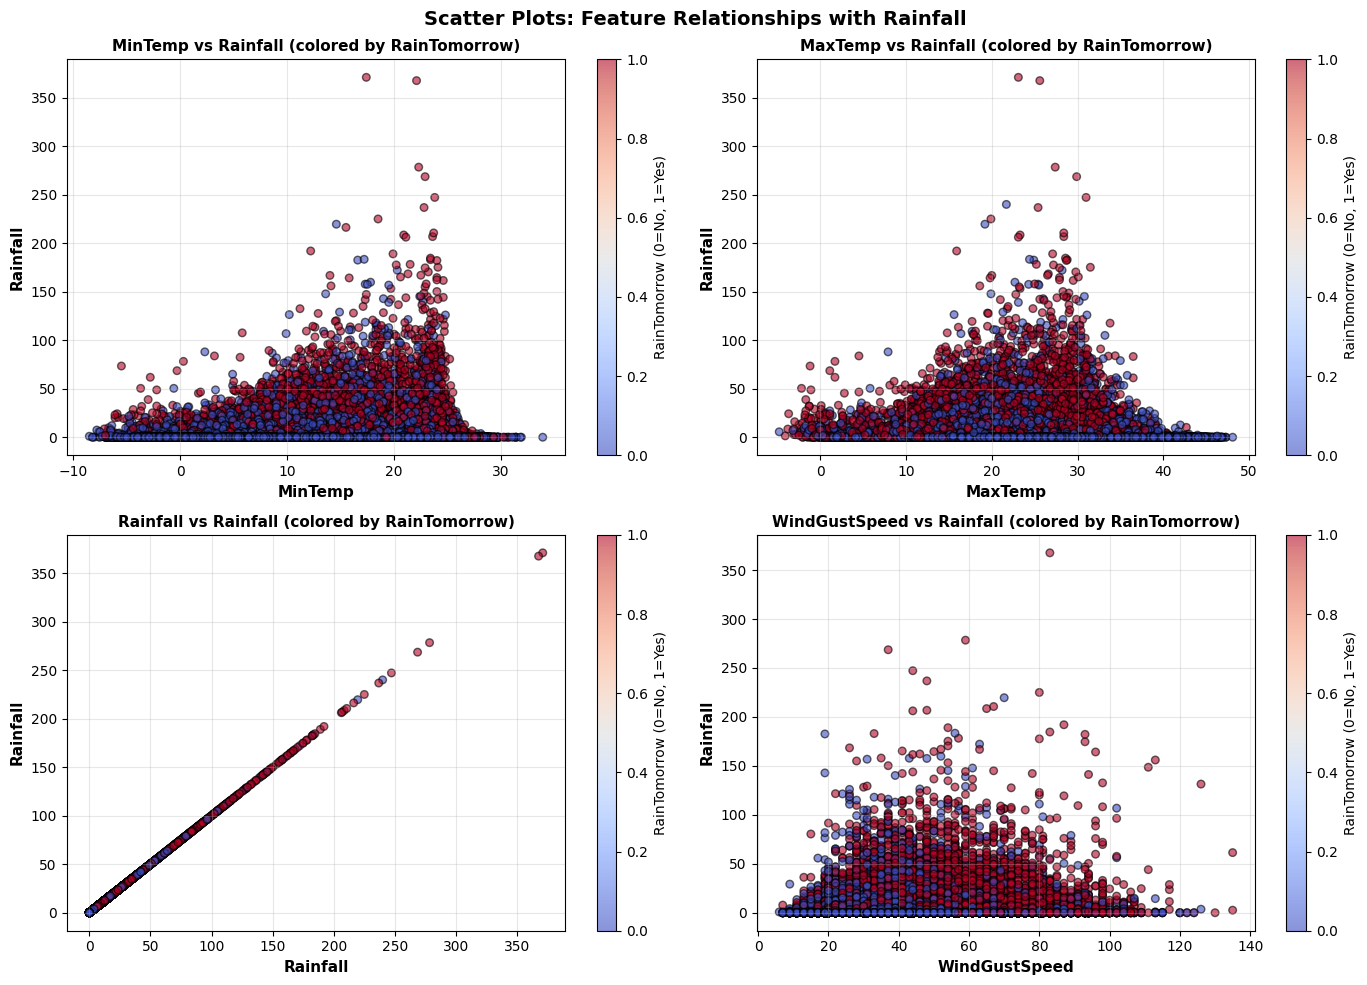

In [121]:

# Map RainTomorrow to numeric (0/1)
data["RainTomorrow_num"] = data["RainTomorrow"].map({"No": 0, "Yes": 1})

# Scatter Plot for Feature Relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
numeric_cols = data.select_dtypes(include=['number']).columns[:4]

for idx, col in enumerate(numeric_cols):
    scatter = axes[idx].scatter(
        data[col],
        data['Rainfall'],
        c=data['RainTomorrow_num'],   # use numeric values here
        cmap='coolwarm',
        alpha=0.6,
        edgecolor='black',
        s=30
    )
    axes[idx].set_xlabel(col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Rainfall', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{col} vs Rainfall (colored by RainTomorrow)', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=axes[idx])
    cbar.set_label('RainTomorrow (0=No, 1=Yes)')

plt.suptitle('Scatter Plots: Feature Relationships with Rainfall', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [122]:
# Drop rows with missing target (RainTomorrow)
data = data.dropna(subset=['RainTomorrow'])
data = data.drop(columns=['RainTomorrow_num'], axis=1)

# Fill remaining missing values with column means (for numeric) or mode (for categorical)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)



C:\Users\HP\AppData\Local\Temp\ipykernel_26292\1405619831.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_26292\1405619831.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [123]:
# Define features and target after label encoding
# Drop non-numeric columns (Date and any other object columns)
X = data.drop('RainTomorrow', axis=1)
X = X.select_dtypes(exclude=['object'])  # Keep only numeric columns
y = data['RainTomorrow']  # Now this is numeric (0/1) after label encoding

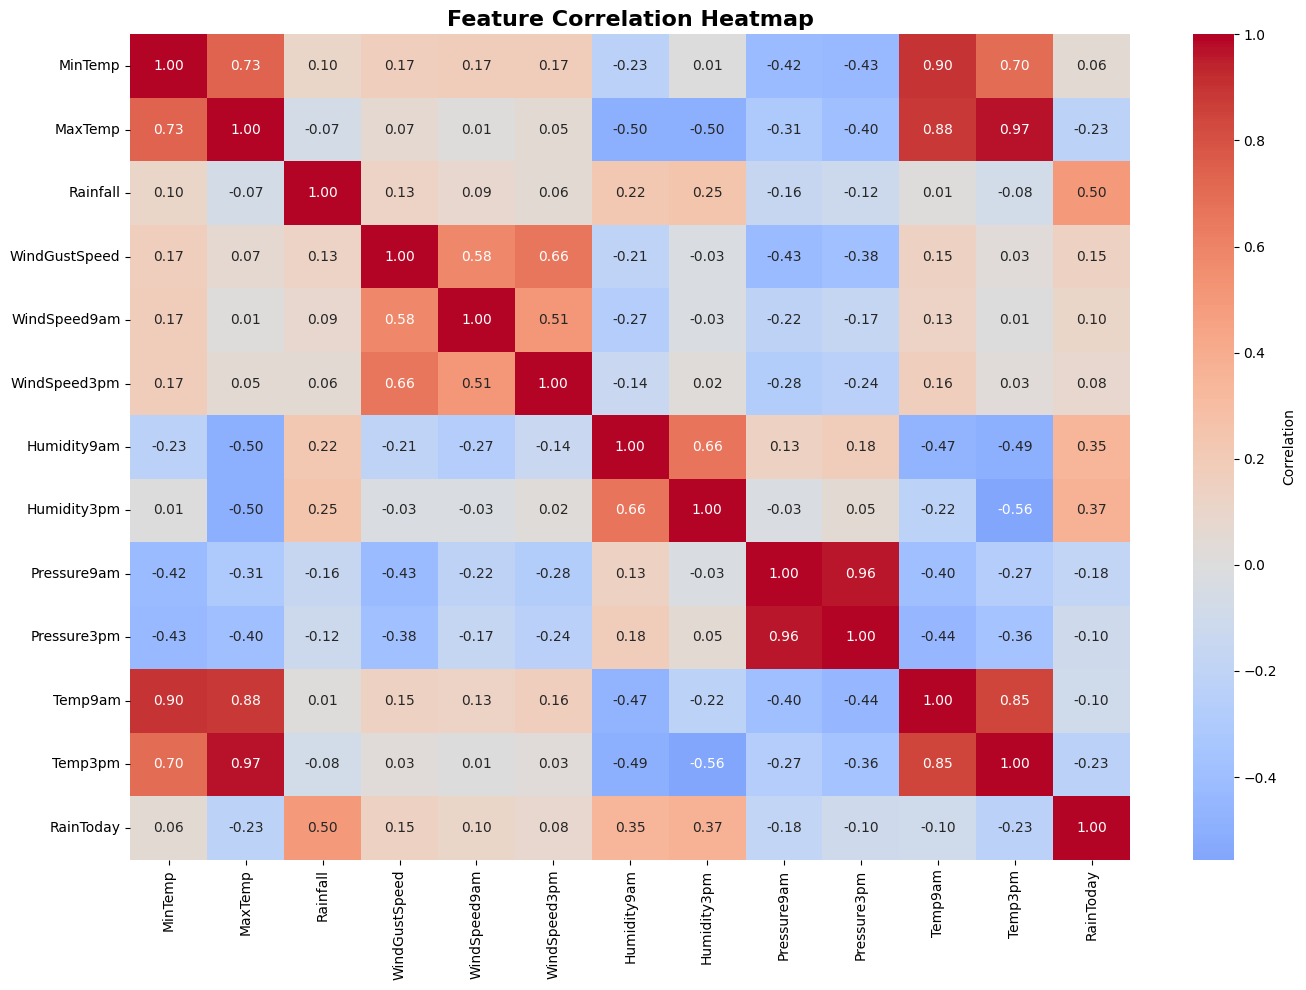

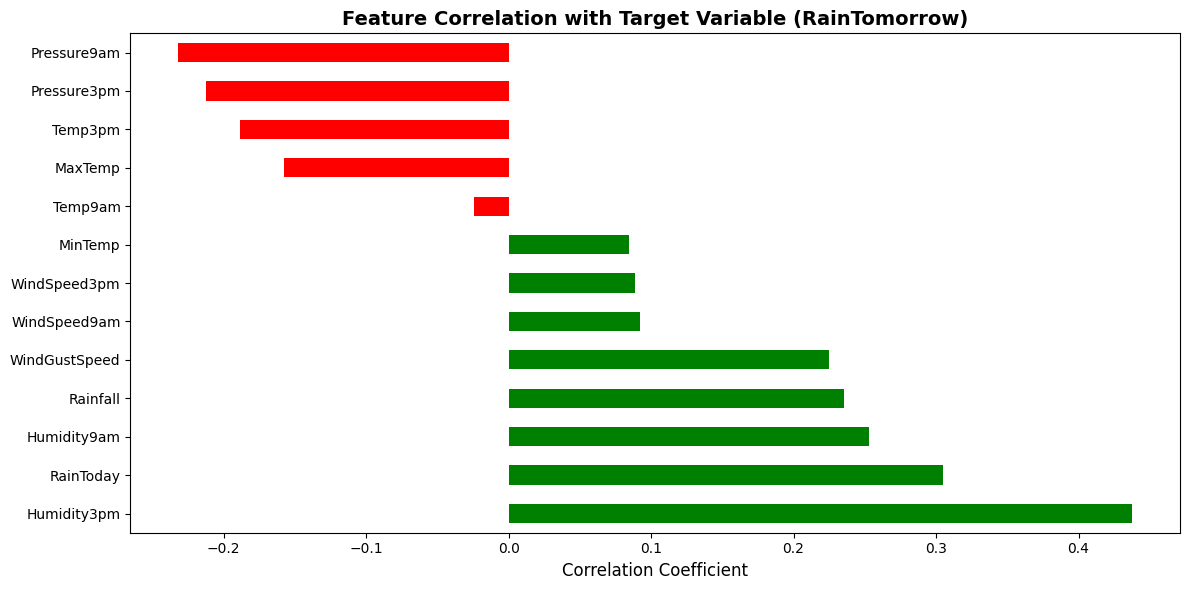


Top 5 Features Most Correlated with RainTomorrow:
Humidity3pm      0.437741
RainToday        0.304864
Humidity9am      0.253307
Rainfall         0.235739
WindGustSpeed    0.225206
Name: RainTomorrow, dtype: float64


In [124]:
# Correlation Heatmap with Annotations
plt.figure(figsize=(14, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Feature Correlation with Target Variable
X_with_target = X.copy()
X_with_target['RainTomorrow'] = y
target_corr = X_with_target.corr()['RainTomorrow'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
target_corr.drop('RainTomorrow').plot(kind='barh', color=['green' if x > 0 else 'red' for x in target_corr.drop('RainTomorrow')])
plt.title('Feature Correlation with Target Variable (RainTomorrow)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.tight_layout()
plt.show()

print('\nTop 5 Features Most Correlated with RainTomorrow:')
print(target_corr.drop('RainTomorrow').head(5))

Splitting the for training and testing

In [125]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data preprocessing complete. Ready for model training.')

Data preprocessing complete. Ready for model training.


In [126]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [127]:
#Models used to train: Logistic Regression, Decision Tree, Random Forest, KNN, SVM, XGBoost

# Logistic Regression Model
# Train the model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Classification Report:\n', classification_report(y_test, y_pred_logreg))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8384431474579846
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22115
           1       0.72      0.45      0.56      6327

    accuracy                           0.84     28442
   macro avg       0.79      0.70      0.73     28442
weighted avg       0.83      0.84      0.82     28442

Confusion Matrix:
 [[20981  1134]
 [ 3461  2866]]


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:

# Decision Tree
# Train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.773011743196681
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     22115
           1       0.49      0.52      0.50      6327

    accuracy                           0.77     28442
   macro avg       0.68      0.68      0.68     28442
weighted avg       0.78      0.77      0.78     28442

Confusion Matrix:
 [[18708  3407]
 [ 3049  3278]]


In [129]:
# Random Forest
# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print('\nRandom Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8511708037409464
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22115
           1       0.76      0.49      0.59      6327

    accuracy                           0.85     28442
   macro avg       0.81      0.72      0.75     28442
weighted avg       0.84      0.85      0.84     28442

Confusion Matrix:
 [[21110  1005]
 [ 3228  3099]]


In [130]:
# Scale features for KNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [131]:
# K-Nearest Neighbors
# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print('\nKNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.8309542226285072
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     22115
           1       0.67      0.48      0.56      6327

    accuracy                           0.83     28442
   macro avg       0.76      0.71      0.73     28442
weighted avg       0.82      0.83      0.82     28442

Confusion Matrix:
 [[20574  1541]
 [ 3267  3060]]


In [132]:
# XGBoost
# Train the model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate
print('\nXGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:200: UserWarning: [19:48:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.8513114408269461
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22115
           1       0.74      0.52      0.61      6327

    accuracy                           0.85     28442
   macro avg       0.80      0.73      0.76     28442
weighted avg       0.84      0.85      0.84     28442

Confusion Matrix:
 [[20946  1169]
 [ 3060  3267]]


In [133]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print('\nNaive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8104212080725688
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     22115
           1       0.58      0.51      0.55      6327

    accuracy                           0.81     28442
   macro avg       0.72      0.70      0.71     28442
weighted avg       0.80      0.81      0.81     28442



In [134]:
# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print('\nLightGBM Accuracy:', accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 25284, number of negative: 88481
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2136
[LightGBM] [Info] Number of data points in the train set: 113765, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222248 -> initscore=-1.252616
[LightGBM] [Info] Start training from score -1.252616

LightGBM Accuracy: 0.8526474931439421
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22115
           1       0.75      0.51      0.61      6327

    accuracy                           0.85     28442
   macro avg       0.81      0.73      0.76     28442
weighted avg       0.84      0.85      0.84     28442



In [135]:
# Extra Trees
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
print('\nExtra Trees Accuracy:', accuracy_score(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))


Extra Trees Accuracy: 0.8494479994374516
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22115
           1       0.76      0.48      0.58      6327

    accuracy                           0.85     28442
   macro avg       0.81      0.72      0.75     28442
weighted avg       0.84      0.85      0.84     28442



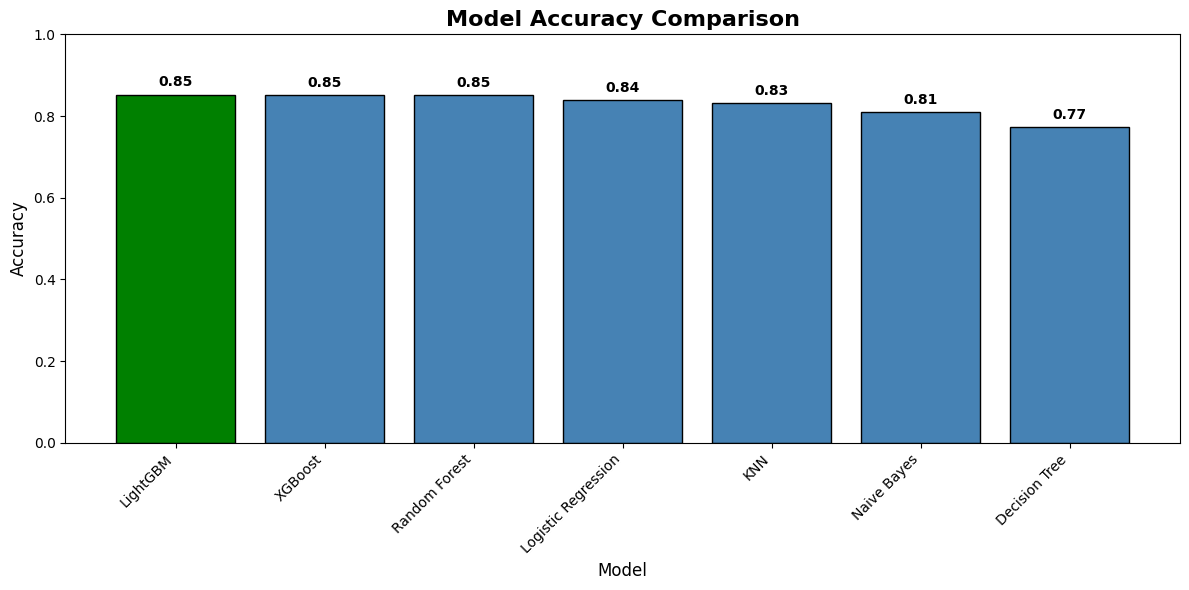


Model Rankings:
1. LightGBM: 0.8526
2. XGBoost: 0.8513
3. Random Forest: 0.8512
4. Logistic Regression: 0.8384
5. KNN: 0.8310
6. Naive Bayes: 0.8104
7. Decision Tree: 0.7730


In [136]:
# Model Accuracy Comparison
# Calculate accuracy for all models
models = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'KNN': accuracy_score(y_test, y_pred_knn),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'LightGBM': accuracy_score(y_test, y_pred_lgbm)
}

# Plot model comparison
plt.figure(figsize=(12, 6))
models_sorted = dict(sorted(models.items(), key=lambda x: x[1], reverse=True))
colors = ['green' if v == max(models_sorted.values()) else 'steelblue' for v in models_sorted.values()]
plt.bar(models_sorted.keys(), models_sorted.values(), color=colors, edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])
for i, (k, v) in enumerate(models_sorted.items()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print('\nModel Rankings:')
for i, (model, accuracy) in enumerate(models_sorted.items(), 1):
    print(f'{i}. {model}: {accuracy:.4f}')

As shown in the above figure the LightGBM has the highest accuracy and hence select this model for training.

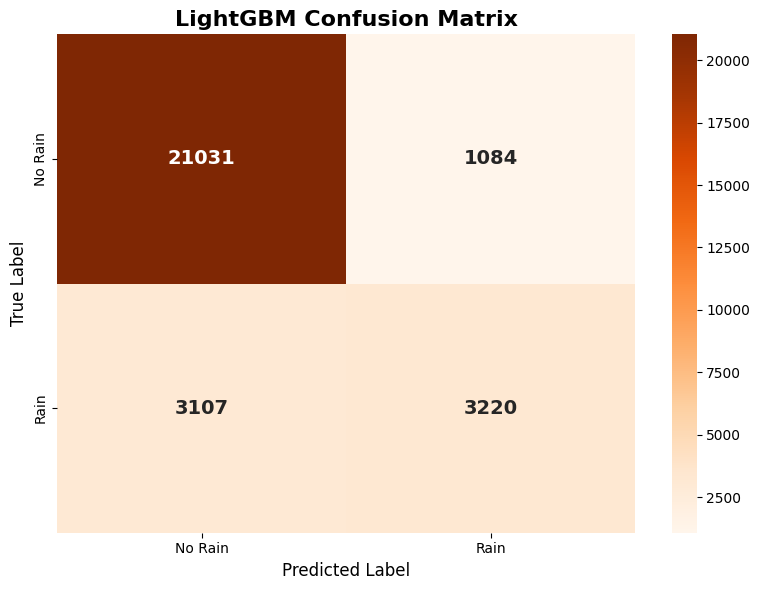


LightGBM Confusion Matrix Breakdown:
True Negatives (TN): 21031 - Correctly predicted No Rain
False Positives (FP): 1084 - Incorrectly predicted Rain (should be No Rain)
False Negatives (FN): 3107 - Incorrectly predicted No Rain (should be Rain)
True Positives (TP): 3220 - Correctly predicted Rain


In [137]:
# Confusion Matrix for LightGBM Model
from sklearn.metrics import confusion_matrix

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Oranges', cbar=True,
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'],
            annot_kws={'size': 14, 'fontweight': 'bold'})
plt.title('LightGBM Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print metrics interpretation
tn, fp, fn, tp = cm_lgbm.ravel()
print('\nLightGBM Confusion Matrix Breakdown:')
print(f'True Negatives (TN): {tn} - Correctly predicted No Rain')
print(f'False Positives (FP): {fp} - Incorrectly predicted Rain (should be No Rain)')
print(f'False Negatives (FN): {fn} - Incorrectly predicted No Rain (should be Rain)')
print(f'True Positives (TP): {tp} - Correctly predicted Rain')

In [138]:
import pickle

In [139]:
# Save the trained model
model_path = 'rainfall_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(lgbm, f)
print(f'Model saved successfully at: {model_path}')

Model saved successfully at: rainfall_model.pkl


In [140]:
# Also save the scaler for future predictions
scaler_path = 'scaler_rainfall.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f'Scaler saved successfully at: {scaler_path}')


Scaler saved successfully at: scaler_rainfall.pkl


In [141]:
# Verify model was saved
import os
if os.path.exists(model_path) and os.path.exists(scaler_path):
    print('\nBoth model and scaler files saved and verified!')
    print(f'Model file size: {os.path.getsize(model_path) / 1024:.2f} KB')
    print(f'Scaler file size: {os.path.getsize(scaler_path) / 1024:.2f} KB')


Both model and scaler files saved and verified!
Model file size: 339.25 KB
Scaler file size: 0.99 KB
